In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [54]:
data = pd.read_csv('house_features.csv')

data = data[data.apply(lambda row: len(row) == 8, axis=1)]

data = data[data['Address'].notnull()]

data['Area'] = pd.to_numeric(data['Area'], errors='coerce')

data = data[data['Area'] < 1000]

data.to_csv('cleaned_dataset.csv', index=False)

df = pd.read_csv('cleaned_dataset.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [55]:
enc = OrdinalEncoder()
numeric_address = enc.fit_transform(df[['Address']])
df['numeric_address'] = numeric_address
df.drop('Address', axis=1, inplace=True)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),numeric_address
0,63.0,1,True,True,True,1.850000e+09,61666.67,156.0
1,60.0,1,True,True,True,1.850000e+09,61666.67,156.0
2,79.0,2,True,True,True,5.500000e+08,18333.33,117.0
3,95.0,2,True,True,True,9.025000e+08,30083.33,152.0
4,123.0,2,True,True,True,7.000000e+09,233333.33,150.0


In [56]:
Y = df['Price(USD)']
Y

0        61666.67
1        61666.67
2        18333.33
3        30083.33
4       233333.33
          ...    
3445    116666.67
3446    226666.67
3447     12166.67
3448    186666.67
3449     12000.00
Name: Price(USD), Length: 3450, dtype: float64

In [57]:
X = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'numeric_address']]
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X.astype(float))
X_scaled[0: 5]

array([[-0.63153331, -1.42237999,  0.42413507,  0.30464673,  0.51940625,
         1.01365174],
       [-0.67467339, -1.42237999,  0.42413507,  0.30464673,  0.51940625,
         1.01365174],
       [-0.40145286, -0.10677383,  0.42413507,  0.30464673,  0.51940625,
         0.23852391],
       [-0.17137242, -0.10677383,  0.42413507,  0.30464673,  0.51940625,
         0.93415145],
       [ 0.23126836, -0.10677383,  0.42413507,  0.30464673,  0.51940625,
         0.89440131]])

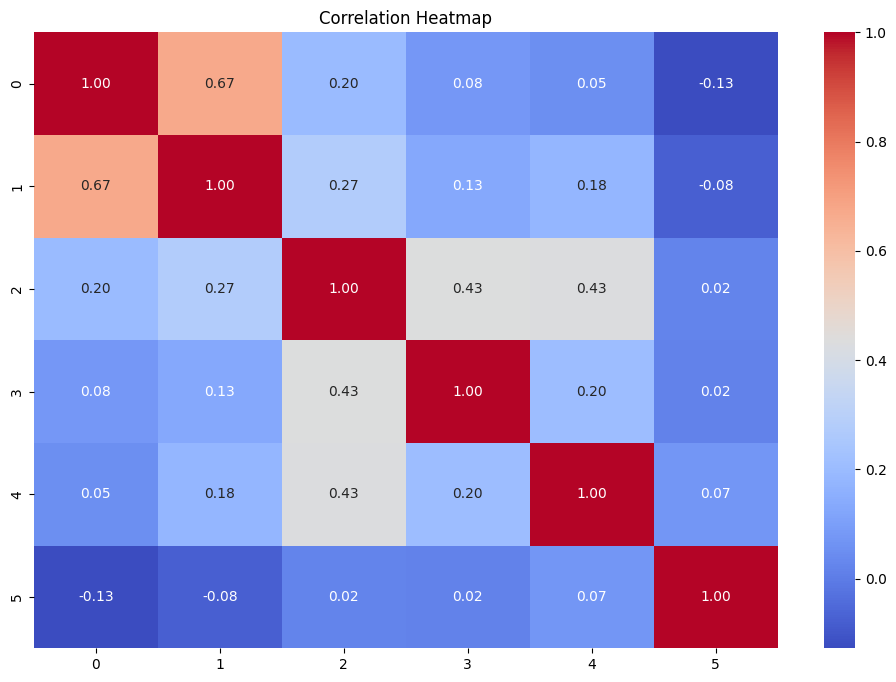

In [58]:
X_scaled_df = pd.DataFrame(X_scaled)
plt.figure(figsize=(12, 8))
correlation_matrix = X_scaled_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

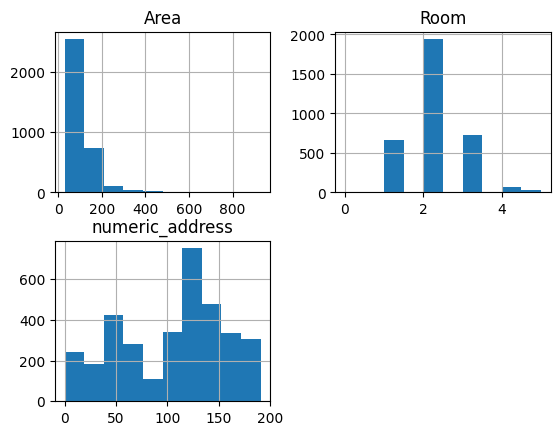

In [59]:
X.hist()
plt.show()

In [60]:
train_x, test_x, train_y, test_y = train_test_split(X_scaled, Y, test_size=0.2, random_state=5)
print('Train set: ', train_x.shape, train_y.shape)
print('Test set: ', test_x.shape, test_y.shape)

Train set:  (2760, 6) (2760,)
Test set:  (690, 6) (690,)


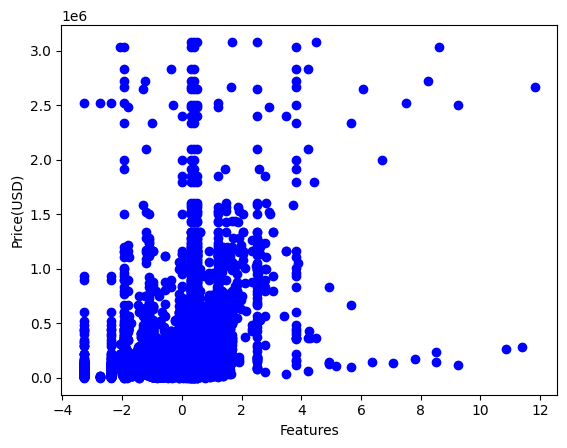

In [61]:
plt.plot(train_x, train_y, 'bo')
plt.xlabel('Features')
plt.ylabel('Price(USD)')
plt.show()

In [62]:
print(train_x[:1])
poly = PolynomialFeatures(degree=1)
train_x_poly = poly.fit_transform(train_x)
train_x_poly[:2]

[[-0.37269281 -0.10677383  0.42413507  0.30464673  0.51940625  0.41739957]]


array([[ 1.        , -0.37269281, -0.10677383,  0.42413507,  0.30464673,
         0.51940625,  0.41739957],
       [ 1.        , -0.35831278, -0.10677383,  0.42413507,  0.30464673,
         0.51940625,  1.5502787 ]])

In [63]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
print(clf.coef_)
print(clf.intercept_)

[     0.         165475.90922511  38365.60096505  -1154.98785387
   9282.42166595  14379.49235544   4724.78376788]
178211.61473050233


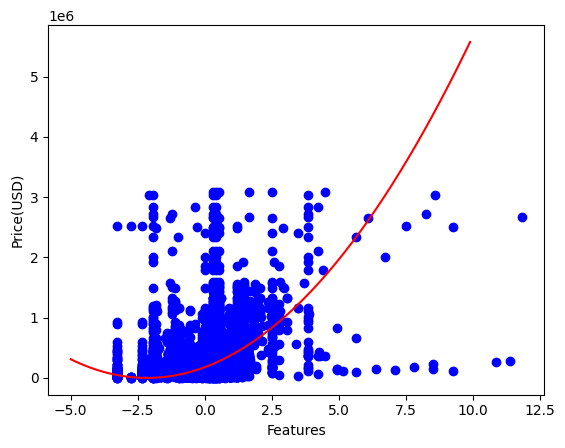

In [64]:
plt.plot(train_x, train_y, 'bo')
XX = np.arange(-5.0, 10.0, 0.1)
yy = clf.intercept_+ clf.coef_[1]*XX+ clf.coef_[2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel('Features')
plt.ylabel('Price(USD)')
plt.show()

In [65]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

R2-score: 0.59
